In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [4]:
runs = 200
steps = 1000
bandits = 10
alpha = .1
eps = [0, .1]
Q_0 = [0.0, 5.0]

In [5]:
q = np.zeros(bandits) # true values
results = np.zeros([4,runs,steps-1])
optimal = np.zeros([4,runs,steps-1])

In [6]:
for i in range(bandits):
    q[i] = np.random.normal(0,1)

In [7]:
for l, epsilon in enumerate(eps):
    for m, Q0 in enumerate(Q_0):
        for k in range(runs):
            R = np.zeros([steps,bandits]) # actual rewards
            gained_reward = np.zeros(steps-1) # gained reward in each step
            A = np.zeros(steps) # selected actions
            opt = np.zeros(steps-1) # percentage of optimal choice
            Q = np.full(bandits,Q0) # value
            counts = np.zeros(bandits) # counts of numbers each bandit was selected
            for j in range(steps-1):
                if np.random.rand() < epsilon:
                    A[j] = np.random.randint(bandits)
                else:
                    index = np.where(Q == np.amax(Q))
                    A[j] = random.choice(index[0])
                idx = A[j].astype(int)
                counts[idx] = counts[idx] + 1
                R[j,idx] = np.random.normal(q[idx],1)
                gained_reward[j] = R[j,idx]
                Q[idx] = Q[idx] + alpha * (R[j,idx] - Q[idx])
                if idx == np.argmax(q): 
                    opt[j] = 100
            n = 2*l+m
            results[n,k,] = np.cumsum(gained_reward)/np.arange(1,steps)
            optimal[n,k,] = np.cumsum(opt)/np.arange(1,steps)

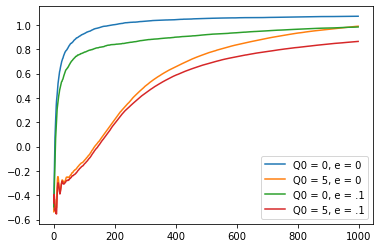

In [8]:
plt.plot(range(steps-1), np.mean(results[0],0), label = 'Q0 = 0, e = 0')
plt.plot(range(steps-1), np.mean(results[1],0), label = 'Q0 = 5, e = 0')
plt.plot(range(steps-1), np.mean(results[2],0), label = 'Q0 = 0, e = .1')
plt.plot(range(steps-1), np.mean(results[3],0), label = 'Q0 = 5, e = .1')
plt.legend()

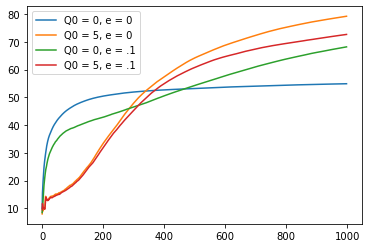

In [9]:
plt.plot(range(steps-1), np.mean(optimal[0],0), label = 'Q0 = 0, e = 0')
plt.plot(range(steps-1), np.mean(optimal[1],0), label = 'Q0 = 5, e = 0')
plt.plot(range(steps-1), np.mean(optimal[2],0), label = 'Q0 = 0, e = .1')
plt.plot(range(steps-1), np.mean(optimal[3],0), label = 'Q0 = 5, e = .1')
plt.legend()